In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator


In [4]:
def thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w):
    α_s = 1 - r_s * (1 - α_m)
    α_i = 1 - r_i * (1 - α_m)
    ψ_w = 1 - w * (1 - ψ)
    γ_p = 1 - p * (1 - γ)
    
    if α == 2:
        mean_a = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a = (1 - α) * (1 - eps**(2 - α)) / ((2 - α) * (1 - eps**(1 - α)))
    
    if α == 3:
        mean_a2 = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a2 = (1 - α) * (1 - eps**(3 - α)) / ((3 - α) * (1 - eps**(1 - α)))
    
    λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)
    return λ_t, mean_a

def act_thresh(eps, alpha, u):
    if u == 0:
        return eps
    elif u == 1:
        return 1
    
    alpha1 = 1 - alpha
    x = (u * (1 - eps ** alpha1) + eps ** alpha1) ** (1 / alpha1)
    return x

def ab_thresh(mu, eps, alpha, m, psi, w_u, gamma, p_u):
    t_w_u = act_thresh(eps, alpha, w_u)
    t_p_u = act_thresh(eps, alpha, p_u)
    mean_a = (1 - alpha) * (1 - eps ** (2 - alpha)) / ((2 - alpha) * (1 - eps ** (1 - alpha)))
    mean_a2 = (1 - alpha) * (1 - eps ** (3 - alpha)) / ((3 - alpha) * (1 - eps ** (1 - alpha)))
    mean_a_w = (1 - alpha) * (t_w_u ** (2 - alpha) - eps ** (2 - alpha)) / ((2 - alpha) * (1 - eps ** (1 - alpha)))
    mean_a_p = (1 - alpha) * (t_p_u ** (2 - alpha) - eps ** (2 - alpha)) / ((2 - alpha) * (1 - eps ** (1 - alpha)))
    mean2_a_w = (1 - alpha) * (t_w_u ** (3 - alpha) - eps ** (3 - alpha)) / ((3 - alpha) * (1 - eps ** (1 - alpha)))
    mean2_a_p = (1 - alpha) * (t_p_u ** (3 - alpha) - eps ** (3 - alpha)) / ((3 - alpha) * (1 - eps ** (1 - alpha)))
    delta = 4 * mean_a2 + (1 - gamma) * (mean_a_p ** 2 * (1 - gamma) - 4 * mean2_a_p) + \
            (1 - psi) * (mean_a_w ** 2 * (1 - psi) - 4 * mean2_a_w) + \
            2 * (1 - psi) * (1 - gamma) * (2 * min(mean2_a_p, mean2_a_w) - mean_a_p * mean_a_w)
    lambda_t = 2 * mu * (m * (2 * mean_a - (1 - psi) * mean_a_w - (1 - gamma) * mean_a_p + np.sqrt(delta))) ** (-1)
    return lambda_t, mean_a

def two_significant_digits(x, pos):
    return "{:.1f}".format(x)

## Phase space w vs p
#### with gamma = 0.1 and psi = 0.1

In [20]:
#Lo faccio diverso perché voglio sempre che l'upper limit sia per R0 = 3
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 1.2 * lam_t

wu = np.linspace(0.6, 1, 100)
pi = np.linspace(0.60, 1, 100)
sErri = np.zeros((len(wu), len(pi)))

for i, wui in enumerate(wu):
    for j, pii in enumerate(pi):
        sErri[j, i] = lam / ab_thresh(0.01, 0.001, 2.1, 2, 0.1, pii, 0.1, wui)[0]
print(sErri)
sErri_n = np.copy(sErri)
sErri_n[sErri_n<1] = np.nan
print(sErri_n)
print(sErri)

[[1.1675064  1.16732412 1.16714002 ... 1.07321377 1.0350209  0.42516794]
 [1.16732412 1.16715583 1.1669717  ... 1.07303598 1.03484142 0.42495371]
 [1.16714002 1.1669717  1.16680184 ... 1.07285655 1.03466028 0.42473753]
 ...
 [1.07321377 1.07303598 1.07285655 ... 1.01399263 0.97517432 0.3490534 ]
 [1.0350209  1.03484142 1.03466028 ... 0.97517432 0.96474515 0.33132955]
 [0.42516794 0.42495371 0.42473753 ... 0.3490534  0.33132955 0.12      ]]
[[1.1675064  1.16732412 1.16714002 ... 1.07321377 1.0350209         nan]
 [1.16732412 1.16715583 1.1669717  ... 1.07303598 1.03484142        nan]
 [1.16714002 1.1669717  1.16680184 ... 1.07285655 1.03466028        nan]
 ...
 [1.07321377 1.07303598 1.07285655 ... 1.01399263        nan        nan]
 [1.0350209  1.03484142 1.03466028 ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
[[1.1675064  1.16732412 1.16714002 ... 1.07321377 1.0350209  0.42516794]
 [1.16732412 1.16715583 1.1669717  ... 

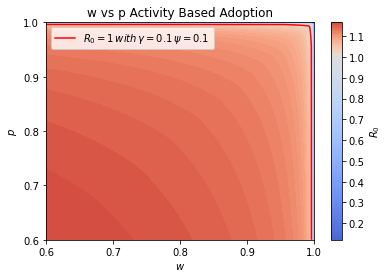

In [12]:
fig, ax = plt.subplots()
contour_levels = np.linspace(sErri.min(), sErri.max(), 150)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 1.2  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax.contourf(wu, pi, sErri, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax.contour(wu, pi, sErri, colors="red", levels=[1])

cbar = plt.colorbar(plot_surface, ax=ax, label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax , 0.1))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax.plot(0, 0, color="red", label=r"$R_0 = 1\,with\,\gamma = 0.1\, \psi = 0.1 $")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax.legend(loc="upper left")

# Label the axes
ax.set_xlabel(r"$w$")
ax.set_ylabel(r"$p$")
ax.set_title("w vs p Activity Based Adoption")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlim(wu.min(), wu.max())  # Set x-axis limits
ax.set_ylim(pi.min(), pi.max())  # Set y-axis limits
plt.gca().xaxis.set_major_locator(MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_act_wvsp_phase_space.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

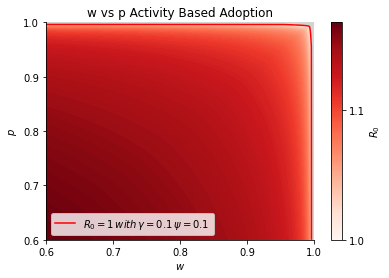

In [21]:
fig, ax = plt.subplots()

contour_levels = np.linspace(1, np.nanmax(sErri_n), 100)
ax.set_facecolor("lightgrey")

plot_surface = ax.contourf(wu, pi, sErri, cmap="Reds", levels = contour_levels)


# Plot contour lines
contour = ax.contour(wu, pi, sErri, colors="red", levels=[1])

cbar = plt.colorbar(plot_surface, ax=ax, label=r"$R_0$")

cbar.set_ticks(np.arange(1, vmax + 1, 0.1))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(1, vmax + 1, 0.1))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax.plot(0, 0, color="red", label=r"$R_0 = 1\,with\,\gamma = 0.1\, \psi = 0.1 $")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax.legend(loc="lower left")

# Label the axes
ax.set_xlabel(r"$w$")
ax.set_ylabel(r"$p$")
ax.set_title("w vs p Activity Based Adoption")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlim(wu.min(), wu.max())  # Set x-axis limits
ax.set_ylim(pi.min(), pi.max())  # Set y-axis limits
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))



file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_act_wvsp_phase_space.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

In [24]:
  lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 1.2 * lam_t

wu = np.linspace(0.95, 1, 100)
pi = np.linspace(0.95, 1, 100)
sErri = np.zeros((len(wu), len(pi)))

for i, wui in enumerate(wu):
    for j, pii in enumerate(pi):
        sErri[j, i] = lam / ab_thresh(0.01, 0.001, 2.1, 2, 0.1, pii, 0.1, wui)[0]
print(sErri)
sErri_n = np.copy(sErri)
sErri_n[sErri_n<1] = np.nan
print(sErri_n)
print(sErri)

[[1.09622547 1.09600371 1.09577913 ... 0.86670519 0.76842341 0.38498243]
 [1.09600371 1.09585831 1.09563371 ... 0.86655061 0.76826563 0.38479657]
 [1.09577913 1.09563371 1.09548689 ... 0.86639453 0.76810631 0.3846088 ]
 ...
 [0.86670519 0.86655061 0.86639453 ... 0.80313344 0.70139519 0.28010526]
 [0.76842341 0.76826563 0.76810631 ... 0.70139519 0.68684324 0.24612515]
 [0.38498243 0.38479657 0.3846088  ... 0.28010526 0.24612515 0.12      ]]
[[1.09622547 1.09600371 1.09577913 ...        nan        nan        nan]
 [1.09600371 1.09585831 1.09563371 ...        nan        nan        nan]
 [1.09577913 1.09563371 1.09548689 ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
[[1.09622547 1.09600371 1.09577913 ... 0.86670519 0.76842341 0.38498243]
 [1.09600371 1.09585831 1.09563371 ... 

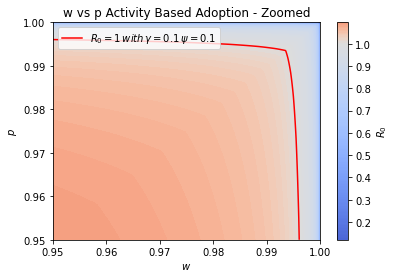

In [16]:
fig, ax = plt.subplots()
contour_levels = np.linspace(sErri.min(), sErri.max(), 150)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 1.2  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax.contourf(wu, pi, sErri, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax.contour(wu, pi, sErri, colors="red", levels=[1])

cbar = plt.colorbar(plot_surface, ax=ax, label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax , 0.1))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.1))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax.plot(0, 0, color="red", label=r"$R_0 = 1\,with\,\gamma = 0.1\, \psi = 0.1 $")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax.legend(loc="upper left")

# Label the axes
ax.set_xlabel(r"$w$")
ax.set_ylabel(r"$p$")
ax.set_title("w vs p Activity Based Adoption - Zoomed")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlim(wu.min(), wu.max())  # Set x-axis limits
ax.set_ylim(pi.min(), pi.max())  # Set y-axis limits
plt.gca().xaxis.set_major_locator(MultipleLocator(0.01))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.01))

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_act_wvsp_zoom_phase_space.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()

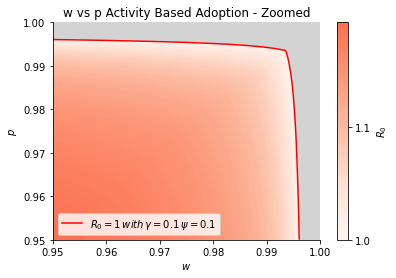

In [31]:
fig, ax = plt.subplots()

contour_levels = np.linspace(1, np.nanmax(sErri_n), 100)
ax.set_facecolor("lightgrey")

plot_surface = ax.contourf(wu, pi, sErri, cmap="Reds", levels = contour_levels, vmax=1.2)


# Plot contour lines
contour = ax.contour(wu, pi, sErri, colors="red", levels=[1])

cbar = plt.colorbar(plot_surface, ax=ax, label=r"$R_0$")

cbar.set_ticks(np.arange(1, 1.2 + 1, 0.05))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(1, 1.2 + 1, 0.05))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax.plot(0, 0, color="red", label=r"$R_0 = 1\,with\,\gamma = 0.1\, \psi = 0.1 $")
#ax.plot(0, 0, color="black", label=r"$R_0 = 1\,perfect\,adoption$")
ax.legend(loc="lower left")

# Label the axes
ax.set_xlabel(r"$w$")
ax.set_ylabel(r"$p$")
ax.set_title("w vs p Activity Based Adoption - Zoomed")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlim(wu.min(), wu.max())  # Set x-axis limits
ax.set_ylim(pi.min(), pi.max())  # Set y-axis limits
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_major_locator(MultipleLocator(0.01))


file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_act_wvsp_zoom_phase_space.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

# Show the plot
plt.show()